## Predicting the Length of Stay in Hospital among Schizophrenic and Other Psychotic Disorders Patients Using Machine Learning

### Introduction

The length of hospital stay (LOS) is a critical measure in healthcare, particularly in psychiatry, as it impacts both the quality of care and resource allocation. Prolonged hospitalizations among patients with schizophrenia and psychotic disorders can increase healthcare costs and affect patients' mental health outcomes. This project aims to apply machine learning techniques to predict the LOS of such patients, enabling healthcare professionals to manage resources and develop personalized discharge plans proactively.

### Import libraries

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

### Data Collection

In [190]:
# Loading the dataset
file_path = '/Users/shubray/Desktop/Hospital_Inpatient_Discharges.csv'

In [191]:
data = pd.read_csv(file_path, low_memory=False)

In [192]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [193]:
# Display the first few rows of the DataFrame
data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,320922.43,60241.34
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,61665.22,9180.69
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,42705.34,11366.50
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,72700.17,12111.75
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,55562.51,8339.72


In [194]:
data.shape

(2135260, 33)

In [195]:
# Observe the distribution of the data
data.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,2.128597e+06,2.130046e+06,2135260.0,2.135260e+06,2.135260e+06,2.135260e+06,2.135260e+06,2.135260e+06
mean,4.957985e+06,1.027173e+03,2021.0,4.140515e+02,1.030720e+01,2.141359e+00,7.283498e+04,2.189511e+04
std,2.261388e+06,7.152164e+02,0.0,2.440670e+02,5.965352e+00,9.755671e-01,1.485984e+05,4.699371e+04
min,1.010000e+05,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,3.400000e-01,1.500000e-01
25%,2.951001e+06,5.280000e+02,2021.0,1.940000e+02,5.000000e+00,1.000000e+00,1.895237e+04,5.995558e+03
50%,5.902001e+06,1.045000e+03,2021.0,3.830000e+02,9.000000e+00,2.000000e+00,3.812219e+04,1.153071e+04
75%,7.002020e+06,1.453000e+03,2021.0,6.400000e+02,1.500000e+01,3.000000e+00,7.668821e+04,2.295603e+04
max,7.004010e+06,1.035500e+04,2021.0,9.560000e+02,2.500000e+01,4.000000e+00,1.793575e+07,1.239287e+07


### Data Cleaning

In [197]:
# Finding missing value
data.isnull().any()

Hospital Service Area                   True
Hospital County                         True
Operating Certificate Number            True
Permanent Facility Id                   True
Facility Name                          False
Age Group                              False
Zip Code - 3 digits                     True
Gender                                 False
Race                                   False
Ethnicity                              False
Length of Stay                         False
Type of Admission                      False
Patient Disposition                    False
Discharge Year                         False
CCSR Diagnosis Code                    False
CCSR Diagnosis Description             False
CCSR Procedure Code                     True
CCSR Procedure Description              True
APR DRG Code                           False
APR DRG Description                    False
APR MDC Code                           False
APR MDC Description                    False
APR Severi

In [198]:
# Summarizing the missing data count for each column
data.isnull().sum()

Hospital Service Area                     5214
Hospital County                           5214
Operating Certificate Number              6663
Permanent Facility Id                     5214
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      40246
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                          0
CCSR Diagnosis Description                   0
CCSR Procedure Code                     583187
CCSR Procedure Description              583187
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [199]:
# Missing data percentage
print(data.isnull().sum()/data.count()*100)

Hospital Service Area                    0.244783
Hospital County                          0.244783
Operating Certificate Number             0.313023
Permanent Facility Id                    0.244783
Facility Name                            0.000000
Age Group                                0.000000
Zip Code - 3 digits                      1.921037
Gender                                   0.000000
Race                                     0.000000
Ethnicity                                0.000000
Length of Stay                           0.000000
Type of Admission                        0.000000
Patient Disposition                      0.000000
Discharge Year                           0.000000
CCSR Diagnosis Code                      0.000000
CCSR Diagnosis Description               0.000000
CCSR Procedure Code                     37.574715
CCSR Procedure Description              37.574715
APR DRG Code                             0.000000
APR DRG Description                      0.000000


In [200]:
# Drop irrelevant columns and excessive missing values
data = data.drop(['Birth Weight','Payment Typology 2','Payment Typology 3','CCSR Procedure Code'], axis=1)

In [201]:
data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Y,320922.43,60241.34
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,Y,61665.22,9180.69
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,N,42705.34,11366.50
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicare,Y,72700.17,12111.75
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Medicare,Y,55562.51,8339.72


In [202]:
# Displaying the count of occurrences for each unique diagnosis in the 'CCSR Diagnosis Description' column
data['CCSR Diagnosis Description'].value_counts()

CCSR Diagnosis Description
Liveborn                                                         202001
Septicemia                                                       140868
COVID-19                                                          83574
Heart failure                                                     59721
Complications specified during childbirth                         41143
                                                                  ...  
Endocrine system cancers - parathyroid                                3
Effect of foreign body entering opening, subsequent encounter         2
Antenatal screening                                                   2
Osteomalacia                                                          1
Lifestyle/life management factors                                     1
Name: count, Length: 478, dtype: int64

In [203]:
data['CCSR Diagnosis Description'].value_counts().head(10)

CCSR Diagnosis Description
Liveborn                                                202001
Septicemia                                              140868
COVID-19                                                 83574
Heart failure                                            59721
Complications specified during childbirth                41143
Diabetes mellitus with complication                      41070
Alcohol-related disorders                                40722
Schizophrenia spectrum and other psychotic disorders     38030
Osteoarthritis                                           35781
Cardiac dysrhythmias                                     34307
Name: count, dtype: int64

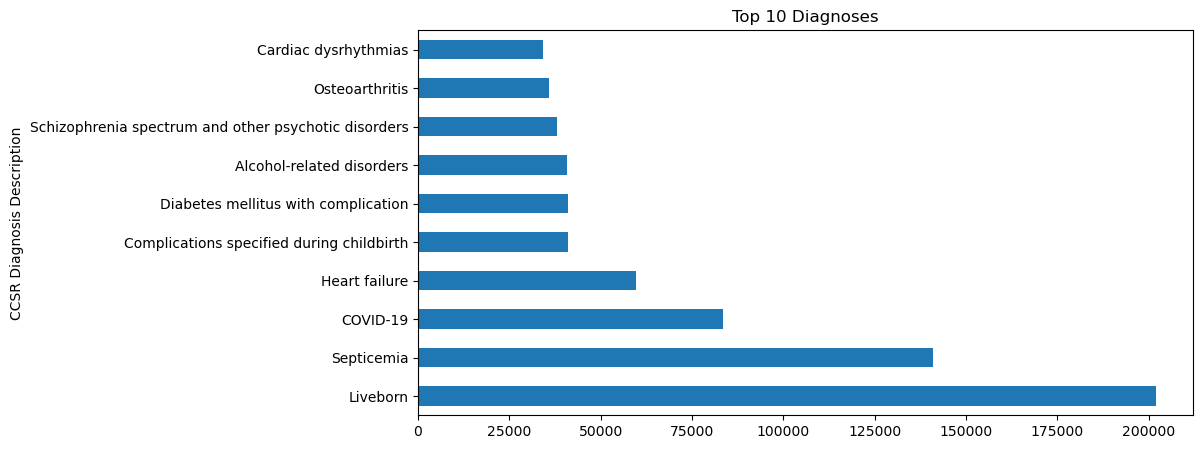

In [204]:
# plotting top 10 diagnosis
data['CCSR Diagnosis Description'].value_counts().head(10).plot(kind='barh', title='Top 10 Diagnoses', figsize=(10,5));

In [205]:
#identify the most common diagnosis-related groups
data['APR DRG Description'].value_counts().head(10)

APR DRG Description
NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWBORN OR NEONATE WITH OTHER PROBLEM    174868
VAGINAL DELIVERY                                                                   126001
SEPTICEMIA AND DISSEMINATED INFECTIONS                                             124160
MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS                                      87978
CESAREAN SECTION WITHOUT STERILIZATION                                              61366
HEART FAILURE                                                                       57839
SCHIZOPHRENIA                                                                       31193
KIDNEY AND URINARY TRACT INFECTIONS                                                 25909
CVA AND PRECEREBRAL OCCLUSION WITH INFARCTION                                       25698
CARDIAC ARRHYTHMIA AND CONDUCTION DISORDERS                                         25370
Name: count, dtype: int64

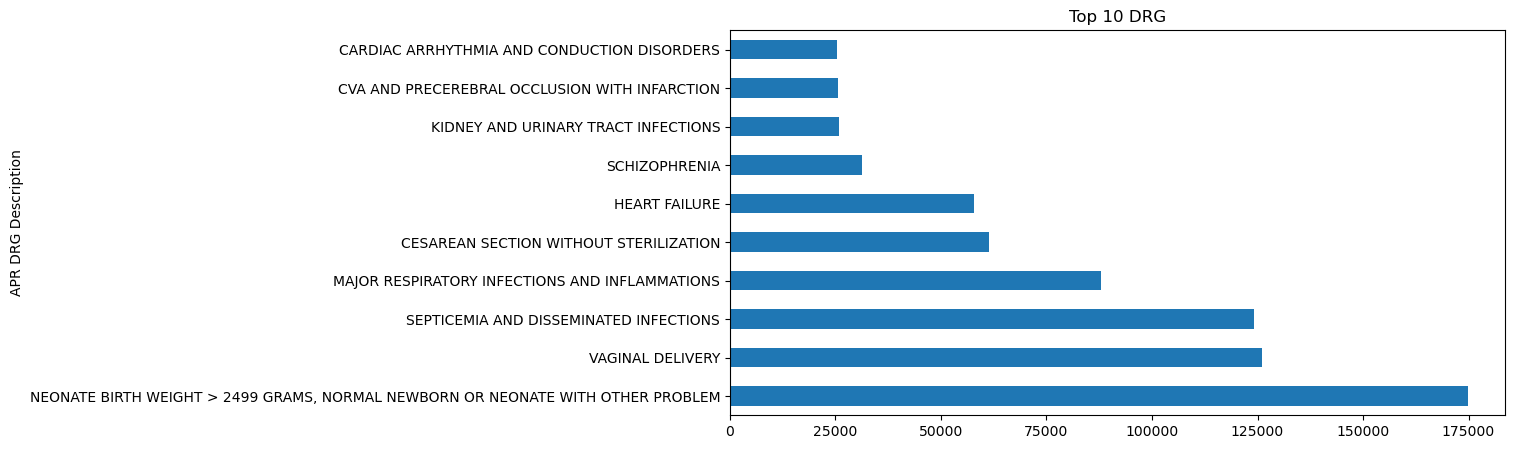

In [206]:
# plotting top 10 diagnosis related group 
data['APR DRG Description'].value_counts().head(10).plot(kind='barh', title='Top 10 DRG', figsize=(10,5));

In [207]:
# Check the unique values in the diagnosis column
data['CCSR Diagnosis Description'].unique()

array(['COVID-19', 'Multiple sclerosis', 'Previous C-section',
       'Urinary tract infections',
       'Paralysis (other than cerebral palsy)',
       'Complication of other surgical or medical care, injury, initial encounter',
       'Traumatic brain injury (TBI); concussion, initial encounter',
       'Liveborn', 'Noninfectious gastroenteritis', 'Asthma',
       'Sickle cell trait/anemia',
       'Other specified diseases of veins and lymphatics',
       'Stress fracture, initial encounter',
       'Encounter for antineoplastic therapies', 'Benign neoplasms',
       'Nerve and nerve root disorders',
       'Complication of transplanted organs or tissue, initial encounter',
       'Fluid and electrolyte disorders',
       'Intestinal obstruction and ileus', 'Epilepsy; convulsions',
       'Male reproductive system cancers - prostate',
       'Schizophrenia spectrum and other psychotic disorders',
       'Coronary atherosclerosis and other heart disease',
       'Alcohol-related diso

In [208]:
# Selecting rows where the 'CCSR Diagnosis Description' is 'Schizophrenia and other psychotic disorders'
sch_data = data[data['CCSR Diagnosis Description'] == 'Schizophrenia spectrum and other psychotic disorders']


In [209]:
# Displaying the first few rows of the filtered dataset
sch_data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
32,New York City,Kings,7001009.0,1294.0,Coney Island Hospital,30 to 49,NaN,M,Other Race,Unknown,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicare,Y,97625.72,44612.90
147,New York City,Manhattan,7002001.0,1438.0,Bellevue Hospital Center,50 to 69,OOS,M,Black/African American,Unknown,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Self-Pay,Y,6051.00,3479.83
152,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,18 to 29,104,M,Other Race,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,Y,6457.61,3832.84
183,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,Y,5504.58,3751.86
200,Hudson Valley,Rockland,4324000.0,776.0,Montefiore Nyack,50 to 69,109,M,Black/African American,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Private Health Insurance,Y,54640.76,14877.09


In [210]:
sch_data.reset_index(drop=True, inplace=True)
sch_data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Kings,7001009.0,1294.0,Coney Island Hospital,30 to 49,NaN,M,Other Race,Unknown,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicare,Y,97625.72,44612.90
1,New York City,Manhattan,7002001.0,1438.0,Bellevue Hospital Center,50 to 69,OOS,M,Black/African American,Unknown,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Self-Pay,Y,6051.00,3479.83
2,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,18 to 29,104,M,Other Race,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,Y,6457.61,3832.84
3,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,M,Black/African American,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Medicaid,Y,5504.58,3751.86
4,Hudson Valley,Rockland,4324000.0,776.0,Montefiore Nyack,50 to 69,109,M,Black/African American,Not Span/Hispanic,...,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Minor,Medical,Private Health Insurance,Y,54640.76,14877.09


In [211]:
# transpose the data
sch_data.T

,0,1,2,3,4,5,6,7,8,9,...,38020,38021,38022,38023,38024,38025,38026,38027,38028,38029
Hospital Service Area,New York City,New York City,New York City,New York City,Hudson Valley,New York City,New York City,New York City,New York City,New York City,...,New York City,New York City,New York City,New York City,New York City,Long Island,New York City,New York City,New York City,New York City
Hospital County,Kings,Manhattan,Bronx,Kings,Rockland,Manhattan,Manhattan,Kings,Manhattan,Queens,...,Kings,Queens,Kings,Kings,Kings,Suffolk,Kings,Manhattan,Kings,Kings
Operating Certificate Number,7001009.0,7002001.0,7000002.0,7001045.0,4324000.0,7002024.0,7002001.0,7001016.0,7002001.0,7003007.0,...,7001045.0,7003007.0,7001045.0,7001045.0,7001009.0,5153000.0,7001045.0,7002001.0,7001045.0,7001045.0
Permanent Facility Id,1294.0,1438.0,1165.0,1692.0,776.0,1456.0,1438.0,1301.0,1438.0,1633.0,...,1692.0,1633.0,1692.0,1692.0,1294.0,913.0,1692.0,1438.0,1692.0,1692.0
Facility Name,Coney Island Hospital,Bellevue Hospital Center,Jacobi Medical Center,Woodhull Medical & Mental Health Center,Montefiore Nyack,Mount Sinai Hospital,Bellevue Hospital Center,Kings County Hospital Center,Bellevue Hospital Center,Queens Hospital Center,...,Woodhull Medical & Mental Health Center,Queens Hospital Center,Woodhull Medical & Mental Health Center,Woodhull Medical & Mental Health Center,Coney Island Hospital,Huntington Hospital,Woodhull Medical & Mental Health Center,Bellevue Hospital Center,Woodhull Medical & Mental Health Center,Woodhull Medical & Mental Health Center
Age Group,30 to 49,50 to 69,18 to 29,30 to 49,50 to 69,50 to 69,18 to 29,18 to 29,30 to 49,50 to 69,...,30 to 49,30 to 49,30 to 49,50 to 69,30 to 49,50 to 69,30 to 49,30 to 49,30 to 49,30 to 49
Zip Code - 3 digits,NaN,OOS,104,112,109,100,100,112,112,114,...,112,114,NaN,112,OOS,OOS,113,100,112,112
Gender,M,M,M,M,M,F,M,F,F,M,...,M,M,M,M,M,M,M,M,F,M
Race,Other Race,Black/African American,Other Race,Black/African American,Black/African American,Black/African American,Black/African American,Other Race,Other Race,Black/African American,...,Black/African American,Other Race,White,Black/African American,White,Other Race,Other Race,Other Race,Other Race,Other Race
Ethnicity,Unknown,Unknown,Not Span/Hispanic,Not Span/Hispanic,Not Span/Hispanic,Not Span/Hispanic,Not Span/Hispanic,Spanish/Hispanic,Spanish/Hispanic,Not Span/Hispanic,...,Not Span/Hispanic,Unknown,Spanish/Hispanic,Unknown,Not Span/Hispanic,Not Span/Hispanic,Unknown,Unknown,Spanish/Hispanic,Spanish/Hispanic


In [212]:
# Check for missing values in 'Length of Stay' in the filtered schizophrenia dataset
missing_length_of_stay_schizophrenia = sch_data['Length of Stay'].isnull().sum()
print(f"Missing values in 'Length of Stay' for Schizophrenia patients: {missing_length_of_stay_schizophrenia}")

Missing values in 'Length of Stay' for Schizophrenia patients: 0


In [213]:
# Select numerical columns in sch_data
num_columns_sch = sch_data.select_dtypes(include=['int64', 'float64'])

# Check for missing values in numerical columns
missing_values_num_sch = num_columns_sch.isnull().sum()

# Filter columns that have missing values
missing_values_num_sch = missing_values_num_sch[missing_values_num_sch > 0]

# Display the result
print("Numeric columns with missing values in schizophrenia dataset:")
print(missing_values_num_sch)

Numeric columns with missing values in schizophrenia dataset:
Operating Certificate Number    73
Permanent Facility Id           73
dtype: int64


In [214]:
# Select categorical columns in sch_data
cat_col_sch = sch_data.select_dtypes(include=['object', 'category'])

# Check for missing values in categorical columns
missing_values_cat_sch = cat_col_sch.isnull().sum()

# Filter columns that have missing values
missing_values_cat_sch = missing_values_cat_sch[missing_values_cat_sch > 0]

# Display the result
print("Categorical columns with missing values in schizophrenia dataset:")
print(missing_values_cat_sch)

Categorical columns with missing values in schizophrenia dataset:
Hospital Service Area            73
Hospital County                  73
Zip Code - 3 digits            1195
CCSR Procedure Description    17157
dtype: int64


In [215]:
num_col_sch = sch_data.select_dtypes(include=['int64', 'float64'])
sch_data[num_col_sch.columns] = num_col_sch.fillna(num_columns_sch.median())


/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_47916/3761159394.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Encoding Categorical Variables

In [216]:
# convert categorical variables into numerical and fill missing values
for label, content in sch_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # adding a binary column
        #sch_data[label+'_is_missing'] = pd.isnull(content)
        # turning categories into numbers and adding +1
        sch_data[label] = pd.Categorical(content).codes+1

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_47916/2291897130.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_47916/2291897130.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1c/pk9x7gmj557585lf_03b7xtr0000gn/T/ipykernel_47916/2291897130.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [217]:
sch_data.isna().sum()

Hospital Service Area                  0
Hospital County                        0
Operating Certificate Number           0
Permanent Facility Id                  0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCSR Diagnosis Code                    0
CCSR Diagnosis Description             0
CCSR Procedure Description             0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg

In [248]:
sch_data.T

,0,1,2,3,4,5,6,7,8,9,...,38020,38021,38022,38023,38024,38025,38026,38027,38028,38029
Hospital Service Area,6.00,6.00,6.00,6.00,4.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00
Hospital County,18.00,19.00,3.00,18.00,34.00,19.00,19.00,18.00,19.00,31.00,...,18.00,31.00,18.00,18.00,18.00,39.00,18.00,19.00,18.00,18.00
Operating Certificate Number,7001009.00,7002001.00,7000002.00,7001045.00,4324000.00,7002024.00,7002001.00,7001016.00,7002001.00,7003007.00,...,7001045.00,7003007.00,7001045.00,7001045.00,7001009.00,5153000.00,7001045.00,7002001.00,7001045.00,7001045.00
Permanent Facility Id,1294.00,1438.00,1165.00,1692.00,776.00,1456.00,1438.00,1301.00,1438.00,1633.00,...,1692.00,1633.00,1692.00,1692.00,1294.00,913.00,1692.00,1438.00,1692.00,1692.00
Facility Name,18.00,5.00,39.00,149.00,67.00,70.00,5.00,44.00,5.00,102.00,...,149.00,102.00,149.00,149.00,18.00,36.00,149.00,5.00,149.00,149.00
Age Group,3.00,4.00,2.00,3.00,4.00,4.00,2.00,2.00,3.00,4.00,...,3.00,3.00,3.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00
Zip Code - 3 digits,0.00,50.00,4.00,12.00,9.00,1.00,1.00,12.00,12.00,14.00,...,12.00,14.00,0.00,12.00,50.00,50.00,13.00,1.00,12.00,12.00
Gender,2.00,2.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00
Race,3.00,1.00,3.00,1.00,1.00,1.00,1.00,3.00,3.00,1.00,...,1.00,3.00,4.00,1.00,4.00,3.00,3.00,3.00,3.00,3.00
Ethnicity,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00,...,2.00,4.00,3.00,4.00,2.00,2.00,4.00,4.00,3.00,3.00


### Conclusion

In this initial phase of the project, I cleaned and preprocessed the dataset. I selected only the rows where the "CCSR Diagnosis Description" was "Schizophrenia spectrum and other psychotic disorders," creating a filtered dataset of schizophrenia patients. I then handled the missing values separately for numerical and categorical columns. For numerical columns, I filled the missing values with the median, while for categorical columns, I converted them into numeric codes. 
Finally, after preprocessing the data, I confirmed that all missing values had been handled, setting the stage for the next step: applying machine learning algorithms to predict the length of stay for patients with schizophrenia and psychotic disorders. My goal is to use these predictions to provide healthcare professionals with insights that can help optimize resource allocation and develop personalized discharge plans, ultimately improving both patient outcomes and healthcare efficiency.